# *Описание виртуальной стажировки*
## Направление Data Analyst, компания P&G

Добро пожаловать на виртуальную стажировку компании Procter & Gamble!  
Предлагаем тебе примерить роль аналитика данных в IT-подразделении международной компании сектора FMCG1, где объединяются бизнес, технологии и инновации.  
   
Мы рекомендуем выполнять задания в указанном порядке, так как они взаимосвязаны между собой и объединены общей темой анализа   временных рядов.  
  
Выполнение всего блока заданий займет у тебя не более 60–80 минут.  
  
По результатам выполнения заданий ты научишься следующему:  
1. Анализировать тренды и сезонность, работая с временными рядами.  
2. Исследовать дата-сет на периодичность и строить график автокорреляции.  
3. Использовать простые средства моделирования наподобие ARIMA2 для прогнозирования временных рядов.  
    

# Задание 1.

Сегодня в качестве Data Analyst компании P&G тебе предстоит проанализировать тренды и сезонность, работая с временными рядами.
Утром ты получил письмо от руководителя с инструкцией по выполнению задания.

<div class='alert alert-success'>
Привет!  
    
Мы столкнулись с необходимостью анализа данных по продажам наших шампуней. Прежде чем
использовать реальные данные, мы просим тебя научиться анализировать открытый дата-сет
shampoo_sales.csv на наличие определенных трендов и сезонности в представленном
временном ряде.  
    
Мы уже прочитали файл с открытыми данными и построили динамику продаж шампуня в
зависимости от месяца.

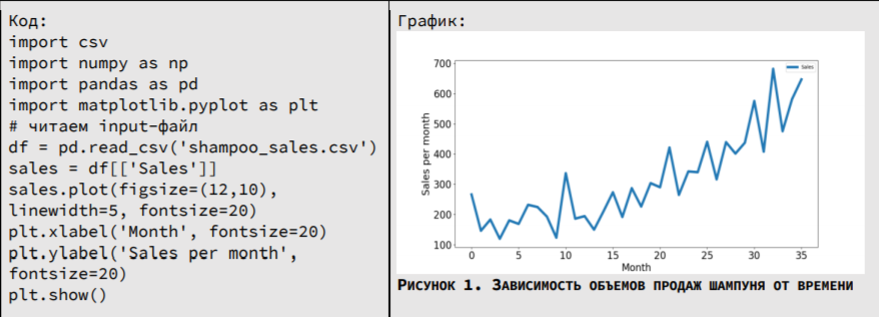

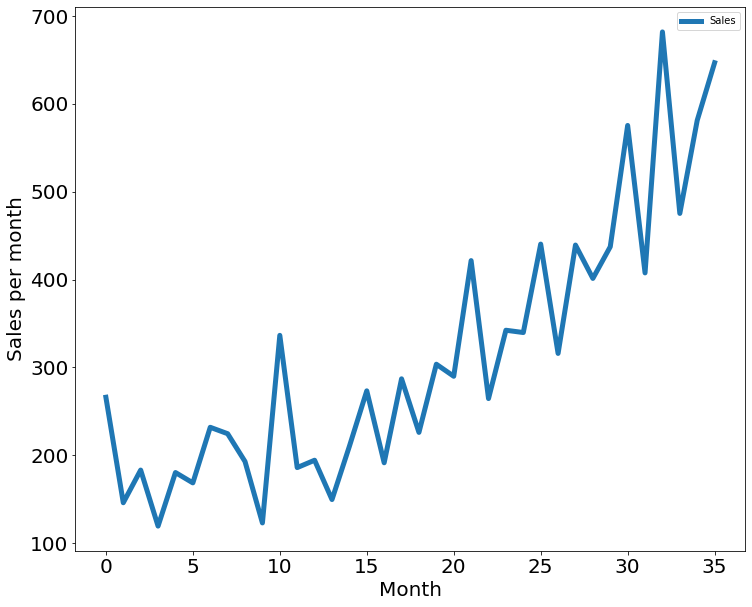

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'shampoo_sales.csv')
sales = df[['Sales']]
sales.plot(figsize=(12,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20),
plt.ylabel('Sales per month', fontsize=20)
plt.show()

<div class='alert alert-success'>
Твоя задача — <b>дополнить код и получить еще два графика, которые нужны для анализа
трендов и сезонности.</b>  
    
Существует несколько способов определения трендов во временных рядах, один из которых
связан с использованием скользящего среднего (a rolling average). Это когда мы берем
для каждой точки временного ряда среднее значение точек по обе стороны от нее. Такой
подход позволяет сглаживать шум и влияние сезонности, выделять определенный тренд в
данных, если он есть.  
    
Что касается поиска сезонных закономерностей в данных, то, наоборот, нужно удалить
тренд временного ряда, чтобы было легче поймать сезонность. Для графического
представления сезонности можно находить разность между последовательными точками
данных, называемую разностью первого порядка (first-order difference).  

In [1]:
import seaborn as sns
sns.__version__

'0.11.0'

In [15]:
# Сделаем понятные красивые читаемые графики
import seaborn as sns
sns.set(
    font_scale=1.2,
    style='whitegrid',
    rc={'figure.figsize':(20,12)})

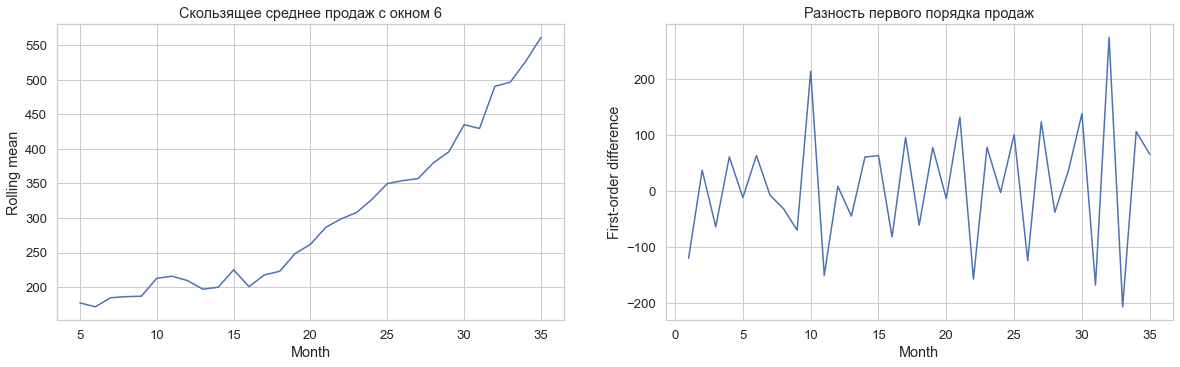

In [16]:
df['Rolling_mean'] = df['Sales'].rolling(6).mean()
df['FOD'] = df['Sales'].diff()
plt.subplot(2,2,1)
plt.plot(df['Rolling_mean'])
plt.xlabel('Month')
plt.ylabel('Rolling mean')
plt.title('Скользящее среднее продаж с окном 6')
plt.subplot(2,2,2)
plt.plot(df['FOD'])
plt.xlabel('Month')
plt.ylabel('First-order difference')
plt.title('Разность первого порядка продаж')
plt.show();

<div class='alert alert-info'><b>Выводы:</b>     
   
1) Тренд, наблюдаемый в данных, на основании скользяшего среднего позитивный, увеличивается последние дней и уже достиг 550.   
2) Cезонность колеблется от ~-200 до ~280.

# Задание 2. Исследование периодичности и построение графика автокорреляции

После успешного завершения анализа трендов и сезонности временных рядов
перед тобой стоит задача построить график автокорреляции.  

На почте ты обнаружил новое письмо от IT-команды. 

<div class='alert alert-success'><b>Выводы:</b>  

Добрый день!
Твоя помощь с анализом трендов и сезонности была очень своевременной.  
    
Теперь нам нужно погрузиться в вопрос корреляции временного ряда. Мы просим тебя
построить график автокорреляции3 для объема продаж шампуней, когда по оси x отложены
значения продаж, а по оси y — то, как ряд коррелировал с самим собой при наличии лага4.  
    
Нам важно посмотреть, для каких лагов у нас идет положительная корреляция, а когда
начинается негативная.  


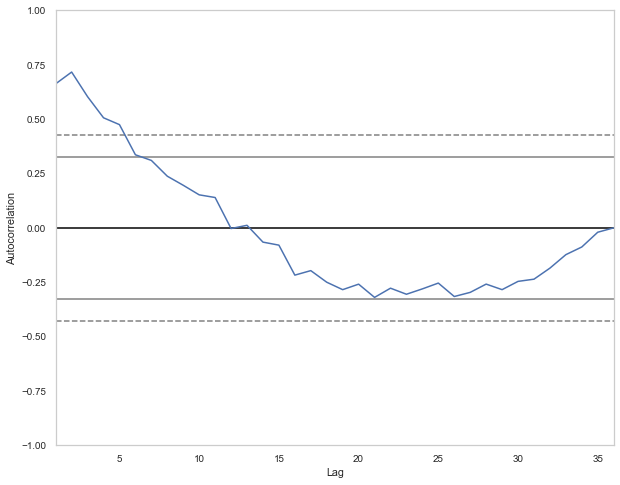

In [7]:
pd.plotting.autocorrelation_plot(df['Sales'])
plt.show()

<div class='alert alert-info'><b>Выводы:</b>  
    
1) Положительная автокорреляция наблюдается для лагов с первого по 11, отрицательная на всех остальных значениях.   
2) Ближе к концу третьего месяца автокорреляция выравнивается на нулевое значение, сохраняя позитивный тренд. 

# Задание 3. Построй модель скользящего прогноза ARIMA

Поздравляем, ты справляешься с работой аналитика данных!
Тем временем на почте появилось новое письмо с инструкцией, что делать
дальше. 

<div class='alert alert-success'>
    
Привет!
      
В качестве последнего задания на сегодня в роли аналитика данных в P&G тебе предстоит
построить модель скользящего прогноза ARIMA.
    
ARIMA (аббревиатура от AutoRegressive Integrated Moving Average) широко используется в
качестве статистического метода прогнозирования временных рядов. В принципе, ARIMA
подходит для прогнозирования, но в таком случае придется добавлять много спецификаций
при обращении к функции predict.
    
Хорошей альтернативой станет модификация модели — скользящий прогноз ARIMA (rolling
forecast ARIMA model), когда дата-сет разделен на обучающий и тестовый наборы данных, и
последний из них используется для генерации прогноза.
    
Мы хотим, чтобы <b>ты создал новый или дополнил уже использованный код и построил модель
скользящего прогноза ARIMA, при этом 60% данных составили бы обучающий набор, а
оставшиеся 40% — тестовый</b>. Не забудь вывести график, сравнивающий реальные данные из
тестовой выборки с теми, что были спрогнозированы моделью.


In [2]:
import statsmodels
statsmodels.__version__

'0.12.0'

In [34]:
import warnings
warnings.filterwarnings('ignore')

predicted=273.0, expected=421.6
predicted=290.3, expected=264.5
predicted=349.1, expected=342.3
predicted=306.5, expected=339.7
predicted=387.4, expected=440.4
predicted=348.2, expected=315.9
predicted=386.3, expected=439.3
predicted=356.1, expected=401.3
predicted=446.4, expected=437.4
predicted=394.7, expected=575.5
predicted=434.9, expected=407.6
predicted=507.9, expected=682.0
predicted=435.5, expected=475.3
predicted=652.7, expected=581.3
predicted=546.3, expected=646.9


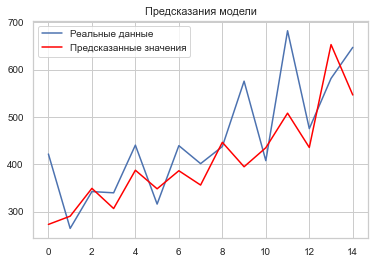

In [55]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

size = int(len(sales) * 0.6)
train_set, test_set = sales.values[0:size], sales.values[size:len(sales)]
history = [x for x in train_set]
predictions = list()

for i in range(len(test_set)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test_set[i]
    history.append(obs)
    print(f'predicted={round(pred[0],1)}, expected={obs}')
    

# plot
plt.plot(test_set)
plt.plot(predictions, color='red')
plt.legend(['Реальные данные','Предсказанные значения'])
plt.title('Предсказания модели')
plt.show()

#### Материалы:  
  
* [ Анализ временных рядов - тренд,сезонность, шум - Электронный учебник K-tree (k-tree.ru).](https://k-tree.ru/articles/statistika/prognozirovanie/analiz_vremennih_ryadov)
* [Нежное введение в автокорреляцию и частичную автокорреляцию (machinelearningmastery.ru).](https://www.machinelearningmastery.ru/gentle-introduction-autocorrelation-partial-autocorrelation/)
* [Видео из онлайн-курса об использовании ARIMA: Выбор ARIMA и прогнозирование.](https://www.coursera.org/lecture/data-analysis-applications/vybor-arima-i-proghnozirovaniie-1lolc)